In [1]:
import torch
print(torch.cuda.is_available())
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4,4)
from scanpy import AnnData

True


In [2]:
data_left=pd.read_hdf('DATA/data_left_mCG.h5',key='data')
data_left.shape

(3290, 37204)

In [3]:
data_left = data_left.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [4]:
data_right=pd.read_hdf('DATA/data_right_rna.h5',key='data')
data_right.shape

(3290, 39714)

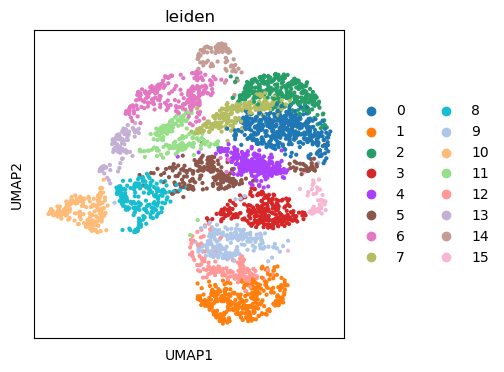

In [5]:
adata=AnnData(data_left)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color='leiden')

In [6]:
sc.tl.rank_genes_groups(adata,'leiden')

In [7]:
use_genes_left=[]
genes_per_cluster=100
for l in adata.obs['leiden'].cat.categories:
    for g in adata.uns['rank_genes_groups']['names'][l][:genes_per_cluster]:
        if g not in use_genes_left:
            use_genes_left.append(g)
len(use_genes_left)

1013

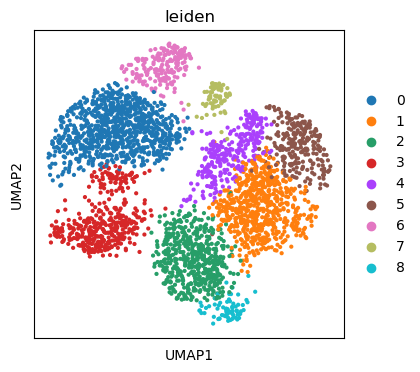

In [8]:
adata=adata[:,use_genes_left]
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color='leiden')

In [9]:
summary=data_left.describe()
summary=summary.T.sort_values('std',ascending=False)
summary

,count,mean,std,min,25%,50%,75%,max
SLC32A1,3290.0,0.511952,0.411565,0.0,0.075704,0.870155,0.908463,1.0
ENSG00000283689,3290.0,0.550715,0.410306,0.0,0.079857,0.888186,0.911708,1.0
LHX1,3290.0,0.442991,0.408866,0.0,0.058516,0.189831,0.905184,1.0
GATA6-AS1,3290.0,0.516133,0.403179,0.0,0.076208,0.865820,0.894267,1.0
TLX3,3290.0,0.575921,0.401167,0.0,0.077158,0.877002,0.895927,1.0
...,...,...,...,...,...,...,...,...
ENSG00000233222,3290.0,0.806489,0.060015,0.0,0.778777,0.791688,0.817012,1.0
DLGAP2,3290.0,0.842914,0.058534,0.0,0.811461,0.848703,0.880753,1.0
ENSG00000226552,3290.0,0.743442,0.056880,0.0,0.713743,0.731719,0.761550,1.0
EEF1A1P21,3290.0,0.801330,0.056821,0.0,0.776366,0.790138,0.814791,1.0


In [10]:
print(data_right.max().max())
print(data_right.min().min())

7.642843450711094
0.0


In [11]:
summary=data_right.describe()
summary=summary.T.sort_values('std',ascending=False)
summary

,count,mean,std,min,25%,50%,75%,max
ERBB4,3290.0,1.965051,2.041247,0.0,0.305500,0.743633,3.888465,6.580834
KCNIP4,3290.0,2.476098,1.760369,0.0,0.611703,2.764219,4.177181,5.512215
NRXN3,3290.0,2.420731,1.750656,0.0,0.664394,2.376030,4.059785,5.970635
PCDH9,3290.0,2.415594,1.615215,0.0,0.621806,2.754489,3.817233,5.765670
NPAS3,3290.0,1.664709,1.604090,0.0,0.274046,0.891700,3.088251,5.606913
...,...,...,...,...,...,...,...,...
MSH5,3290.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
RNA5SP362,3290.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
TMBIM4,3290.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
CSNK2B,3290.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [12]:
summary[summary['max']==0].index

Index(['ENSG00000234932', 'HEXA', 'RPL12P35', 'OTX2P2', 'MEMO1P4', 'RNU6.692P',
       'ENSG00000229750', 'RNU6.763P', 'RPA3P1', 'IGKV1.9',
       ...
       'ENSG00000257865', 'CFB', 'ENSG00000244255', 'ENSG00000257779',
       'ENSG00000289319', 'MSH5', 'RNA5SP362', 'TMBIM4', 'CSNK2B', 'U1.5'],
      dtype='object', length=3199)

In [13]:
data_right=data_right[summary[summary['max']!=0].index]

In [14]:
data_right = data_right.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [15]:
# summary=data_right.describe()
# summary=summary.T.sort_values('std',ascending=False)
# summary

In [16]:
print(data_right.max().max())
print(data_right.min().min())

1.0
0.0


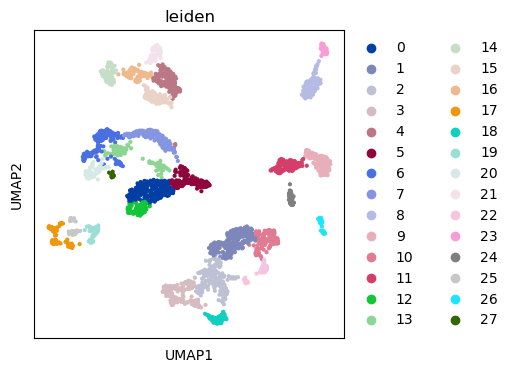

In [17]:
adata=AnnData(data_right)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color='leiden')

1153


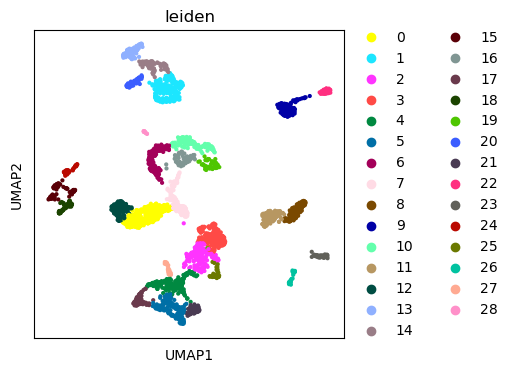

In [18]:
sc.tl.rank_genes_groups(adata,'leiden')
use_genes_right=[]
genes_per_cluster=100
for l in adata.obs['leiden'].cat.categories:
    for g in adata.uns['rank_genes_groups']['names'][l][:genes_per_cluster]:
        if g not in use_genes_right:
            use_genes_right.append(g)
print(len(use_genes_right))
adata=adata[:,use_genes_right]
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color='leiden')

In [19]:
print(data_left.max().max())
print(data_left.min().min())

1.0
0.0


In [22]:
data_left.to_hdf('DATA/data_left_prepared_full.h5', key='data', mode='w')
data_right.to_hdf('DATA/data_right_prepared_full.h5', key='data', mode='w')

In [20]:
data_left.shape

(3290, 37204)

In [21]:
data_right.shape

(3290, 36515)

In [24]:
data_left=data_left[use_genes_left]

In [25]:
data_right=data_right[use_genes_right]

In [26]:
data_left.to_hdf('DATA/data_left_prepared.h5', key='data', mode='w')
data_right.to_hdf('DATA/data_right_prepared.h5', key='data', mode='w')